In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

#set the style of the picture
plt.style.use('ggplot')

#設定中文字體 & 負號的正常顯示
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

#read in file
credit_data = pd.read_excel("credit card.xlsx")

#test if I can get the data out
print(type(credit_data))
credit_data.info()
credit_data['年']

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
年                  1946 non-null object
月-期底               1945 non-null float64
機構類型名稱             1945 non-null object
機構名稱               1945 non-null object
流通卡數-張             1945 non-null float64
有效卡數-張             1945 non-null float64
本月發卡數-張            1945 non-null float64
本月停卡數-張            1945 non-null float64
循環信用餘額-新臺幣百萬元      1945 non-null float64
本月簽帳金額-新臺幣百萬元      1945 non-null float64
本月預借現金金額-新臺幣百萬元    1945 non-null float64
逾期帳款比率-%           1945 non-null float64
備抵呆帳提足率-%          1945 non-null object
本月轉銷呆帳金額-新臺幣百萬元    1945 non-null float64
循環信用利息收入-新臺幣百萬元    1945 non-null float64
簽帳手續費收入-新臺幣百萬元     1945 non-null float64
預借現金手續費-新臺幣百萬元     1945 non-null float64
收單特約商店家數-家         1945 non-null float64
dtypes: float64(14), object(4)
memory usage: 273.7+ KB


0       104
1       104
2       104
3       104
4       104
5       104
6       104
7       104
8       104
9       104
10      104
11      104
12      104
13      104
14      104
15      104
16      104
17      104
18      104
19      104
20      104
21      104
22      104
23      104
24      104
25      104
26      104
27      104
28      104
29      104
       ... 
1916    107
1917    107
1918    107
1919    107
1920    107
1921    107
1922    107
1923    107
1924    107
1925    107
1926    107
1927    107
1928    107
1929    107
1930    107
1931    107
1932    107
1933    107
1934    107
1935    107
1936    107
1937    107
1938    107
1939    107
1940    107
1941    107
1942    107
1943    107
1944    107
1945      　
Name: 年, Length: 1946, dtype: object

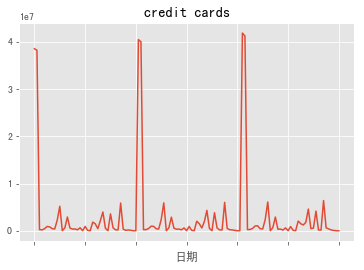

In [38]:
#analysis
credit_data.groupby('年')['本月發卡數-張'].mean()
#credit_data.head(5)
#credit_data

#reference
#https://medium.com/datainpoint/%E5%BE%9E-pandas-%E9%96%8B%E5%A7%8B-python-%E8%88%87%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E4%B9%8B%E6%97%85-8dee36796d4a
#https://www.kesci.com/home/project/59f6f45ac5f3f511952c2bf8
#https://blog.mazhangjing.com/2018/03/21/learn_pandas_3/
credit_data.groupby('年')['流通卡數-張'].agg(sum)
#print(credit_data[987:1946])
#credit_data[(credit_data['機構類型名稱'] == '本國銀行')]
#credit_data[(credit_data['年'] == 106) & (credit_data['機構類型名稱'] == '本國銀行')]
data1 = credit_data[credit_data['年'].between('105', '107')]

data_year = data1[(data1['月-期底'] == 1.0)]
data_year[['年', '流通卡數-張']].plot(kind = 'line', x = '年', y = '流通卡數-張', title = 'credit cards', legend = False)
plt.xlabel('日期')
plt.show()

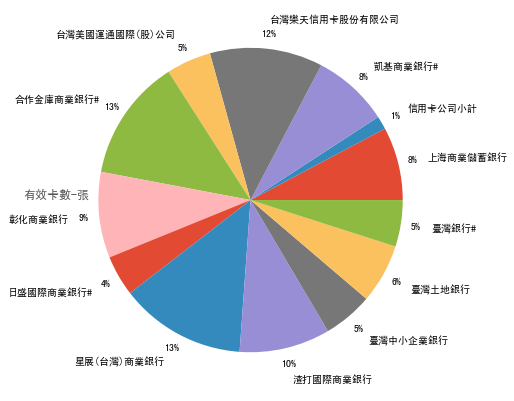

In [50]:
credit_data[(credit_data['機構名稱'] == '臺灣銀行#')]

data0 = credit_data[credit_data['有效卡數-張'].between(100000, 400000)]
data_banks = data0[data0['年'] == '107'].groupby(by = '機構名稱')['有效卡數-張'].sum()

plt.figure(figsize=(10,7))
plt.ylabel('y',rotation=0)

data_banks.plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
#data1_banks = credit_data[credit_data['年'] == '107'].groupby(by = '機構名稱')['有效卡數-張'].sum()
#type(data1_banks)

#data1_banks.plot.pie()
#plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)
#plt.show()